In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, time
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")



In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
rc('font', family='Arial Unicode MS')


In [3]:
merge = pd.read_csv('./data/df_merged.csv')

In [4]:
merge

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,estimate_delivery_time_diff,delivery_time,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7 days 02:34:47,2 days 08:47:45,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,3,"credit_card, voucher",1,38.71
1,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04,9 days 06:37:19,0 days 23:57:27,...,8a4002923e801e3120a11070fd31c9e2,3149,sao paulo,SP,-23.574809,-46.587471,1,credit_card,2,223.38
2,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15,9 days 04:39:40,0 days 09:38:50,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,1,credit_card,1,44.11
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,9 days 09:15:17,1 days 19:23:17,...,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,-23.565578,-46.534603,1,credit_card,3,37.77
4,ded23d37cdcc25b37b4473b7be770cb2,f96144f946e8e590fabf60a3a1e3342e,delivered,2018-07-26 18:25:40,2018-07-27 02:10:26,2018-08-02 14:13:00,2018-08-07 12:12:23,2018-08-20,12 days 11:47:37,6 days 12:02:34,...,806ab9e6d7c897da7e3b6104dadadc34,3366,sao paulo,SP,-23.565578,-46.534603,1,boleto,1,102.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98171,fc703730f6206ec478cae91c89f7dcb3,d99700792f0811f23d94f2edb64634f8,delivered,2018-07-28 18:01:11,2018-07-28 18:15:14,2018-07-30 14:06:00,2018-08-06 16:41:43,2018-08-15,8 days 07:18:17,1 days 19:50:46,...,8b8c8f067a3faaf116211277147a88de,35494,desterro de entre rios,MG,-20.657355,-44.340017,1,credit_card,1,58.28
98172,f1a1942c32bd91ad8368164ae571b8f7,9632f1ff07591588a9596b99f8515c03,delivered,2018-04-16 20:51:56,2018-04-17 20:51:45,2018-04-19 19:54:43,2018-04-30 15:43:45,2018-05-16,15 days 08:16:15,1 days 23:02:58,...,1ef6a1d949703afd7a74347aed3b0503,77413,gurupi,TO,-11.743299,-49.048090,1,credit_card,3,59.03
98173,ff64e0ba4800eb1127ac32aeac2b51f9,16482587049b0c2a607dd532d0653696,delivered,2017-11-20 16:46:51,2017-11-20 16:56:23,2017-11-24 15:39:15,2017-12-05 00:57:57,2017-12-13,7 days 23:02:03,3 days 22:42:52,...,ebc6df639d125e446f07c0e9b1e47b90,32250,contagem,MG,-19.967817,-44.048033,1,credit_card,7,148.47
98174,ada8de3a9486cea2fce7f4b00319cf3c,9065a96b91a08c08755c4ea2618884f2,delivered,2018-07-09 18:25:16,2018-07-11 03:26:03,2018-07-11 12:12:00,2018-07-24 21:22:15,2018-08-06,12 days 02:37:45,0 days 08:45:57,...,ed81a42bec90c87578108d2e4c742d20,44798,umburanas,BA,-10.728517,-41.324377,1,boleto,1,123.75


In [5]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98176 entries, 0 to 98175
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       98176 non-null  object 
 1   customer_id                    98176 non-null  object 
 2   order_status                   98176 non-null  object 
 3   order_purchase_timestamp       98176 non-null  object 
 4   order_approved_at              98176 non-null  object 
 5   order_delivered_carrier_date   98176 non-null  object 
 6   order_delivered_customer_date  97080 non-null  object 
 7   order_estimated_delivery_date  98176 non-null  object 
 8   estimate_delivery_time_diff    97080 non-null  object 
 9   delivery_time                  98176 non-null  object 
 10  product_id                     98176 non-null  object 
 11  seller_id                      98176 non-null  object 
 12  price                          98176 non-null 

In [6]:
merge.nunique()

order_id                         94582
customer_id                      94582
order_status                         2
order_purchase_timestamp         94067
order_approved_at                86865
order_delivered_carrier_date     78688
order_delivered_customer_date    92741
order_estimated_delivery_date      445
estimate_delivery_time_diff      89217
delivery_time                    84784
product_id                       31460
seller_id                         2908
price                             5766
freight_value                     6895
order_count                         16
product_category_name               71
product_weight_g                  2164
product_length_cm                   99
product_height_cm                  102
product_width_cm                    95
customer_unique_id               91539
customer_zip_code_prefix         14696
customer_city                     4022
customer_state                      27
customer_lat                     14692
customer_lng             

# R

- 가장 최근 일자를 기준으로 하여 각 고객별 r을 구해, 기준일까지 얼마나 지났는가를 구함 

In [7]:
recency = merge.groupby('customer_unique_id')['order_purchase_timestamp'].max().reset_index()

In [8]:
recency.rename(columns={'order_purchase_timestamp':'recency'},inplace=True)

In [9]:
max_date = recency['recency'].max()
max_date

'2018-09-03 09:06:57'

In [10]:
recency 

,customer_unique_id,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
...,...,...
91534,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36
91535,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
91536,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16
91537,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41


In [11]:
recency.recency =pd.to_datetime(recency.recency )

In [12]:
max_date=pd.to_datetime(max_date)

In [13]:
recency['diff_date'] = (max_date - recency['recency']).dt.days # dt.days : 시간 없이 날짜만 남기기

In [14]:
recency 

,customer_unique_id,recency,diff_date
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292
...,...,...,...
91534,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,451
91535,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,266
91536,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,572
91537,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,123


In [15]:
recency['diff_date'].describe()

count    91539.000000
mean       243.105529
std        152.519037
min          0.000000
25%        119.000000
50%        224.000000
75%        352.000000
max        728.000000
Name: diff_date, dtype: float64

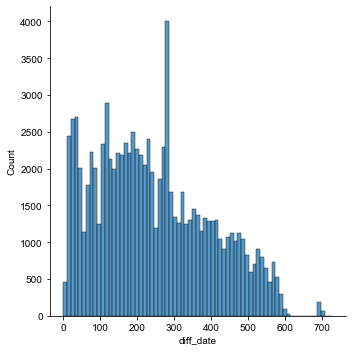

In [16]:
sns.displot(recency['diff_date'])

In [17]:
r_bins = pd.qcut(recency['diff_date'], 5, labels = [5,4,3,2,1])
recency['r_score'] = r_bins

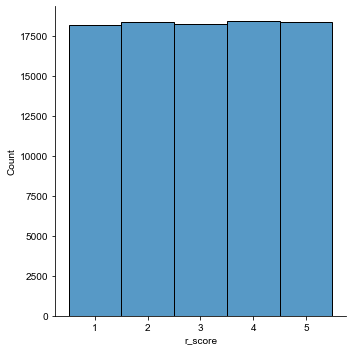

In [18]:
sns.displot(recency['r_score'])

# F

- frequency 점수의 분포를 살펴봤을 때, 1회 또는 2회만 구매한 고객이 너무 많아서 pd.qcut() 함수가 적용이 불가능하다는 것을 알게 되었습니다. 그렇기 때문에 F 점수는 나머지와 다르게 1회 구매했으면 1점, 2회 구매했으면 2점, 3회 구매했으면 3점, 4회 구매했으면 4점, 그 이상 구매했으면 5점을 부여하는 함수를 만들어 적용했습니다.

In [19]:
frequency = merge.groupby('customer_unique_id')['order_purchase_timestamp'].nunique().reset_index()

In [20]:
frequency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91539 entries, 0 to 91538
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_unique_id        91539 non-null  object
 1   order_purchase_timestamp  91539 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [21]:
frequency.rename(columns={'order_purchase_timestamp':'frequency'},inplace=True)

In [22]:
frequency

,customer_unique_id,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
91534,fffcf5a5ff07b0908bd4e2dbc735a684,1
91535,fffea47cd6d3cc0a88bd621562a9d061,1
91536,ffff371b4d645b6ecea244b27531430a,1
91537,ffff5962728ec6157033ef9805bacc48,1


In [23]:
def parse_values(x):
    switch = {
        1: 1,
        2: 2,
        3: 3,
        4: 4
    }
    return switch.get(x, 5)
    
frequency['f_score'] = frequency['frequency'].apply(parse_values)

In [24]:
frequency.nunique()

customer_unique_id    91539
frequency                 9
f_score                   5
dtype: int64

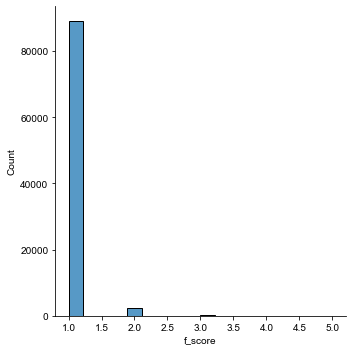

In [25]:
sns.displot(frequency['f_score'])

# M

In [26]:
monetary = merge.groupby('customer_unique_id')['payment_value'].sum().reset_index()

In [27]:
monetary.rename(columns={'payment_value':'monetary'},inplace=True)

In [28]:
m_bins = pd.qcut(monetary['monetary'], 5, labels = [1, 2, 3, 4, 5])
monetary['m_score'] = m_bins

In [29]:
monetary.monetary.describe()

count    91539.000000
mean       175.801464
std        264.898628
min          9.590000
25%         63.220000
50%        108.810000
75%        188.445000
max      15978.650000
Name: monetary, dtype: float64

In [30]:
monetary.m_score.value_counts()

2    18318
4    18311
1    18309
5    18304
3    18297
Name: m_score, dtype: int64

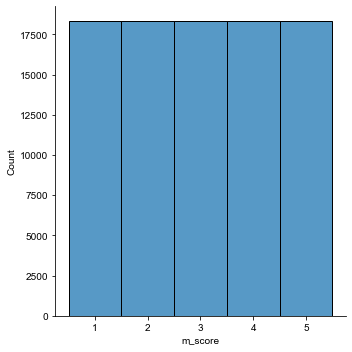

In [31]:
sns.displot(monetary['m_score'] )

# K_means

- r,m값 정규화

In [32]:
# recency, frequency, monetary 데이터프레임 하나로 합치기
rfm_score = recency.merge(frequency, on = 'customer_unique_id')
rfm_score = rfm_score.merge(monetary, on = 'customer_unique_id')

In [33]:
rfm_score

,customer_unique_id,recency,diff_date,r_score,frequency,f_score,monetary,m_score
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115,4,1,1,141.90,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118,4,1,1,27.19,1
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541,1,1,1,86.22,2
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325,2,1,1,43.62,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292,2,1,1,196.89,4
...,...,...,...,...,...,...,...,...
91534,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,451,1,1,1,4134.84,5
91535,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,266,3,1,1,84.58,2
91536,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,572,1,1,1,112.46,3
91537,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,123,4,1,1,133.69,3


In [34]:
from sklearn.preprocessing import MinMaxScaler


scaler= pd.DataFrame()


scaler[['diff_date','monetary']] = rfm_score[['diff_date','monetary']]

In [35]:
scaler

,diff_date,monetary
0,115,141.90
1,118,27.19
2,541,86.22
3,325,43.62
4,292,196.89
...,...,...
91534,451,4134.84
91535,266,84.58
91536,572,112.46
91537,123,133.69


In [36]:
mms = MinMaxScaler()
mms.fit(scaler)
scaler=mms.transform(scaler)
scaler

array([[0.15796703, 0.0082854 ],
       [0.16208791, 0.00110213],
       [0.74313187, 0.00479865],
       ...,
       [0.78571429, 0.00644183],
       [0.16895604, 0.00777128],
       [0.67032967, 0.00388063]])

In [37]:
scaler= pd.DataFrame(scaler,
                    columns=('diff_date','monetary'))
scaler

,diff_date,monetary
0,0.157967,0.008285
1,0.162088,0.001102
2,0.743132,0.004799
3,0.446429,0.002131
4,0.401099,0.011729
...,...,...
91534,0.619505,0.258328
91535,0.365385,0.004696
91536,0.785714,0.006442
91537,0.168956,0.007771


- 정규화 r score 계산 

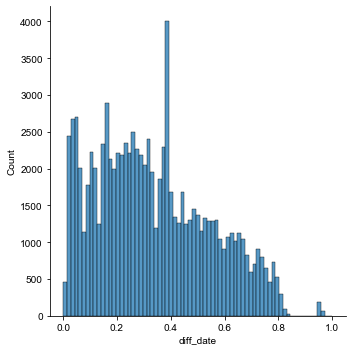

In [38]:
sns.displot(scaler['diff_date'])

In [39]:
r_bins = pd.qcut(scaler['diff_date'], 5, labels = [5,4,3,2,1])
scaler['r_score'] = r_bins
scaler

,diff_date,monetary,r_score
0,0.157967,0.008285,4
1,0.162088,0.001102,4
2,0.743132,0.004799,1
3,0.446429,0.002131,2
4,0.401099,0.011729,2
...,...,...,...
91534,0.619505,0.258328,1
91535,0.365385,0.004696,3
91536,0.785714,0.006442,1
91537,0.168956,0.007771,4


- 정규화 m_score 값 계산

In [40]:
m_bins = pd.qcut(scaler['monetary'], 5, labels = [1, 2, 3, 4, 5])
scaler['m_score'] = m_bins
scaler

,diff_date,monetary,r_score,m_score
0,0.157967,0.008285,4,4
1,0.162088,0.001102,4,1
2,0.743132,0.004799,1,2
3,0.446429,0.002131,2,1
4,0.401099,0.011729,2,4
...,...,...,...,...
91534,0.619505,0.258328,1,5
91535,0.365385,0.004696,3,2
91536,0.785714,0.006442,1,3
91537,0.168956,0.007771,4,3


- f_scoer 연결 및 값 제거 

In [41]:
scaler["f_score"]=rfm_score["f_score"]

In [42]:
scaler.drop(['diff_date','monetary'],axis=1)

,r_score,m_score,f_score
0,4,4,1
1,4,1,1
2,1,2,1
3,2,1,1
4,2,4,1
...,...,...,...
91534,1,5,1
91535,3,2,1
91536,1,3,1
91537,4,3,1


In [ ]:
scaler.describe()

In [43]:
#scaler['degree']=kmeans.labels_
#scaler

- 타당성 조사 

1. Elbow method(엘보우 기법)

군집 내 오차제곱합(SSE, sum of squared error)의 합을 군집화의 비용함수로 정의.
군집 수가 늘어날수록 비용함수는 감소함.
이때, 비용함수 감소 기울기가 급격히 줄어드는 부분(더이상 군집을 늘려도 크게 비용이 감소하지 않는 부분)을 최적의 군집수로 판단한다.
KElbowVisualizer 라이브러리를 활용하여 손쉽게 계산 및 시각화를 할 수 있다.


In [44]:
from sklearn.cluster import KMeans

<AxesSubplot:>

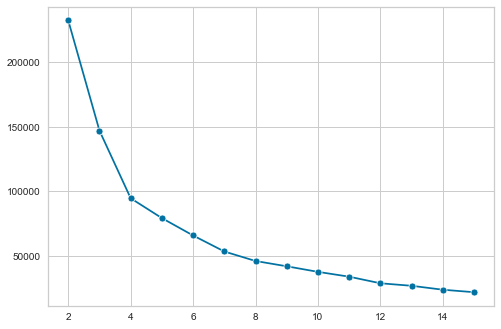

In [45]:
from yellowbrick.cluster import KElbowVisualizer

inertias = []

for k in range(2,16): 
    model = KMeans(n_clusters=k, random_state=7)
    model.fit(scaler)
    inertias.append(model.inertia_)

sns.lineplot(x=range(2, 16), y=inertias, marker='o')


- 실루엣계수 

In [46]:
from sklearn.metrics import silhouette_score, silhouette_samples

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=7).fit(scaler)
    silhouette_avg = silhouette_score(scaler, kmeans.labels_)
    print(f'cluster : {k} // silhouette index {silhouette_avg}')


cluster : 2 // silhouette index 0.36048576366994556
cluster : 3 // silhouette index 0.3985643516263027
cluster : 4 // silhouette index 0.42974276236434533
cluster : 5 // silhouette index 0.423024544315213


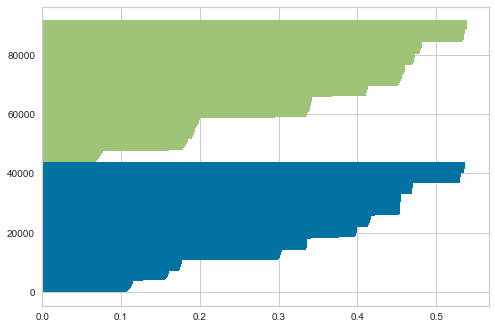

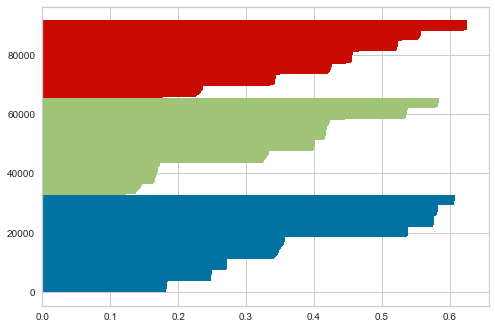

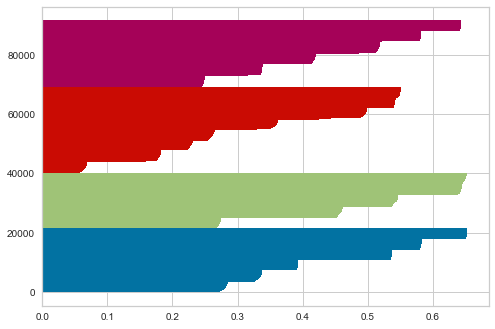

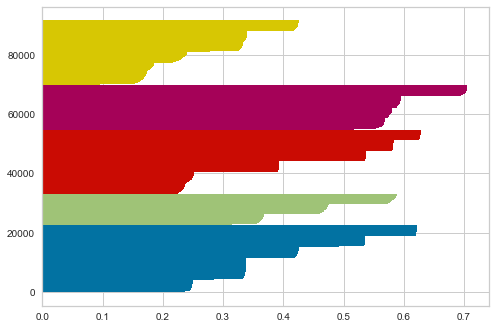

In [47]:
for k in range(2, 6):
    fig, ax = plt.subplots(1, 1)
    kmeans = KMeans(n_clusters=k, random_state=7).fit(scaler)
    silhouette_vals = silhouette_samples(scaler, kmeans.labels_)
    y_ticks = []
    y_lower = y_upper = 0
    for c_num in np.unique(kmeans.labels_):
        cluster_silhouette_vals = silhouette_vals[kmeans.labels_==c_num]
        y_upper += len(cluster_silhouette_vals)
        cluster_silhouette_vals.sort() # numpy array는 sort 메소드를 이용하면 오름차순으로 정렬된 형태로 바뀜
        
        ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
        y_lower += len(cluster_silhouette_vals)


- k_means cluster()

In [48]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,random_state=7)

kmeans.fit(scaler)

KMeans(n_clusters=4, random_state=7)

- 결과 레이블 확인

In [49]:
print(kmeans.labels_)

[3 0 1 ... 1 3 1]


- 군집 중심값 확인

In [51]:
scaler['customer_unique_id']=rfm_score['customer_unique_id']

scaler

,diff_date,monetary,r_score,m_score,f_score,customer_unique_id
0,0.157967,0.008285,4,4,1,0000366f3b9a7992bf8c76cfdf3221e2
1,0.162088,0.001102,4,1,1,0000b849f77a49e4a4ce2b2a4ca5be3f
2,0.743132,0.004799,1,2,1,0000f46a3911fa3c0805444483337064
3,0.446429,0.002131,2,1,1,0000f6ccb0745a6a4b88665a16c9f078
4,0.401099,0.011729,2,4,1,0004aac84e0df4da2b147fca70cf8255
...,...,...,...,...,...,...
91534,0.619505,0.258328,1,5,1,fffcf5a5ff07b0908bd4e2dbc735a684
91535,0.365385,0.004696,3,2,1,fffea47cd6d3cc0a88bd621562a9d061
91536,0.785714,0.006442,1,3,1,ffff371b4d645b6ecea244b27531430a
91537,0.168956,0.007771,4,3,1,ffff5962728ec6157033ef9805bacc48


In [52]:
scaler["grade"]=kmeans.labels_

In [53]:
customed_columns=['customer_unique_id','diff_date','monetary','r_score','f_score','m_score','grade']

scaler=scaler[customed_columns]
scaler

,customer_unique_id,diff_date,monetary,r_score,f_score,m_score,grade
0,0000366f3b9a7992bf8c76cfdf3221e2,0.157967,0.008285,4,1,4,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.162088,0.001102,4,1,1,0
2,0000f46a3911fa3c0805444483337064,0.743132,0.004799,1,1,2,1
3,0000f6ccb0745a6a4b88665a16c9f078,0.446429,0.002131,2,1,1,1
4,0004aac84e0df4da2b147fca70cf8255,0.401099,0.011729,2,1,4,2
...,...,...,...,...,...,...,...
91534,fffcf5a5ff07b0908bd4e2dbc735a684,0.619505,0.258328,1,1,5,2
91535,fffea47cd6d3cc0a88bd621562a9d061,0.365385,0.004696,3,1,2,0
91536,ffff371b4d645b6ecea244b27531430a,0.785714,0.006442,1,1,3,1
91537,ffff5962728ec6157033ef9805bacc48,0.168956,0.007771,4,1,3,3


In [55]:
#scaler.to_csv('./data/scaler.csv', index=False)

In [57]:
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
rc('font', family='Arial Unicode MS')

In [70]:
def get_grade(score):
    if score == 3:
        return '다이이몬드'
    elif score ==2:
        return '골드'
    elif score ==1:
        return "실버"
    else:
        return "브론즈"

In [71]:
scaler["grade"]=scaler["grade"].apply(get_grade)
scaler

,customer_unique_id,diff_date,monetary,r_score,f_score,m_score,grade
0,0000366f3b9a7992bf8c76cfdf3221e2,0.157967,0.008285,4,1,4,다이이몬드
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.162088,0.001102,4,1,1,브론즈
2,0000f46a3911fa3c0805444483337064,0.743132,0.004799,1,1,2,실버
3,0000f6ccb0745a6a4b88665a16c9f078,0.446429,0.002131,2,1,1,실버
4,0004aac84e0df4da2b147fca70cf8255,0.401099,0.011729,2,1,4,골드
...,...,...,...,...,...,...,...
91534,fffcf5a5ff07b0908bd4e2dbc735a684,0.619505,0.258328,1,1,5,골드
91535,fffea47cd6d3cc0a88bd621562a9d061,0.365385,0.004696,3,1,2,브론즈
91536,ffff371b4d645b6ecea244b27531430a,0.785714,0.006442,1,1,3,실버
91537,ffff5962728ec6157033ef9805bacc48,0.168956,0.007771,4,1,3,다이이몬드


Text(0, 0.5, 'count')

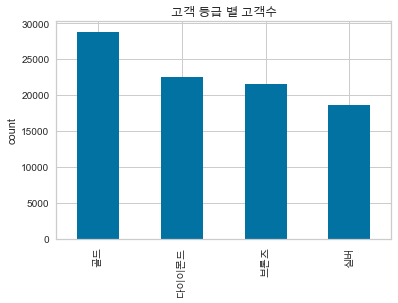

In [72]:
scaler["grade"].value_counts().plot(kind='bar')
plt.title('고객 등급 별 고객수')
plt.ylabel("count")

In [74]:
scaler["grade"].value_counts(normalize = True)

골드       0.314751
다이이몬드    0.246518
브론즈      0.235768
실버       0.202963
Name: grade, dtype: float64